## 1. Import

In [122]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np

# DEPOT 기본값
DEPOT_XY = (0, 0)
DEPOT = "DEPOT"

def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def move_time(u, v, speed):
    return manhattan(u, v) / speed


## 2. Data Load

In [123]:
# 데이터 파일 경로 (사용자 환경에 맞게 수정)
agv_path = "/kaggle/input/smart-logistics-optimization/agv.csv"
task_path = "/kaggle/input/smart-logistics-optimization/task.csv"

agv_df  = pd.read_csv(agv_path)
task_df = pd.read_csv(task_path)

# 컬럼명 정리
agv_df.columns  = [c.strip().lower() for c in agv_df.columns]
task_df.columns = [c.strip().lower() for c in task_df.columns]

print("AGV 데이터:", agv_df.shape)
print("Task 데이터:", task_df.shape)
display(agv_df.head())
display(task_df.head())

AGV 데이터: (15, 4)
Task 데이터: (100, 6)


,agv_id,speed_cells_per_sec,max_distance,capacity
0,A001,2,878,7
1,A002,1,875,3
2,A003,2,864,7
3,A004,2,787,5
4,A005,2,867,5


,task_id,x,y,service_time,demand,deadline
0,T0001,45,10,31,2,436
1,T0002,27,13,83,1,356
2,T0003,3,13,120,1,395
3,T0004,37,24,70,3,573
4,T0005,30,18,55,1,404


In [124]:
agv_stats = {
    "median_speed": agv_df["speed_cells_per_sec"].median(),
    "min_speed": agv_df["speed_cells_per_sec"].min(),
    "max_speed": agv_df["speed_cells_per_sec"].max(),
    "std_speed": agv_df["speed_cells_per_sec"].std(),

    "median_capacity": agv_df["capacity"].median(),
    "min_capacity": agv_df["capacity"].min(),
    "max_capacity": agv_df["capacity"].max(),
    "total_capacity": agv_df["capacity"].sum(),

    "median_max_distance": agv_df["max_distance"].median(),
    "min_max_distance": agv_df["max_distance"].min(),
    "max_max_distance": agv_df["max_distance"].max(),
}

task_stats = {
    "median_x": task_df["x"].median(),
    "median_y": task_df["y"].median(),
    "median_demand": task_df["demand"].median(),
    "median_deadline": task_df["deadline"].median(),
    "median_service_time": task_df["service_time"].median(),
}


THRESHOLDS = {
    "speed_T": agv_stats["median_speed"],
    "capacity_T": agv_stats["median_capacity"],
    "distance_T": agv_stats["median_max_distance"],
    "demand_T": task_stats["median_demand"],
    "deadline_T": task_stats["median_deadline"],
    "service_T": task_stats["median_service_time"],
}


print("\n=== AGV 통계 (중앙값 기준) ===")
for k, v in agv_stats.items():
    print(f"{k:22s}: {v}")

print("\n=== 작업 통계 (중앙값 기준) ===")
for k, v in task_stats.items():
    print(f"{k:22s}: {v}")

print("\n=== 기준값(Thresholds) ===")
for k, v in THRESHOLDS.items():
    print(f"{k:22s}: {v}")


=== AGV 통계 (중앙값 기준) ===
median_speed          : 1.0
min_speed             : 1
max_speed             : 2
std_speed             : 0.5070925528371101
median_capacity       : 6.0
min_capacity          : 3
max_capacity          : 7
total_capacity        : 81
median_max_distance   : 772.0
min_max_distance      : 452
max_max_distance      : 931

=== 작업 통계 (중앙값 기준) ===
median_x              : 30.0
median_y              : 24.5
median_demand         : 2.0
median_deadline       : 426.0
median_service_time   : 68.0

=== 기준값(Thresholds) ===
speed_T               : 1.0
capacity_T            : 6.0
distance_T            : 772.0
demand_T              : 2.0
deadline_T            : 426.0
service_T             : 68.0


=== 속도(speed_cells_per_sec) ===
최소: 1
최대: 2
평균: 1.40
중앙값: 1.00
Q1 (25%): 1.00
Q3 (75%): 2.00
표준편차: 0.49

=== 용량(capacity) ===
최소: 3
최대: 7
평균: 5.40
중앙값: 6.00
Q1 (25%): 4.00
Q3 (75%): 7.00
총 용량: 81

=== 최대거리(max_distance) ===
최소: 452
최대: 931
평균: 739.47
중앙값: 772.00
Q1 (25%): 589.50
Q3 (75%): 865.50

총 AGV 대수: 15


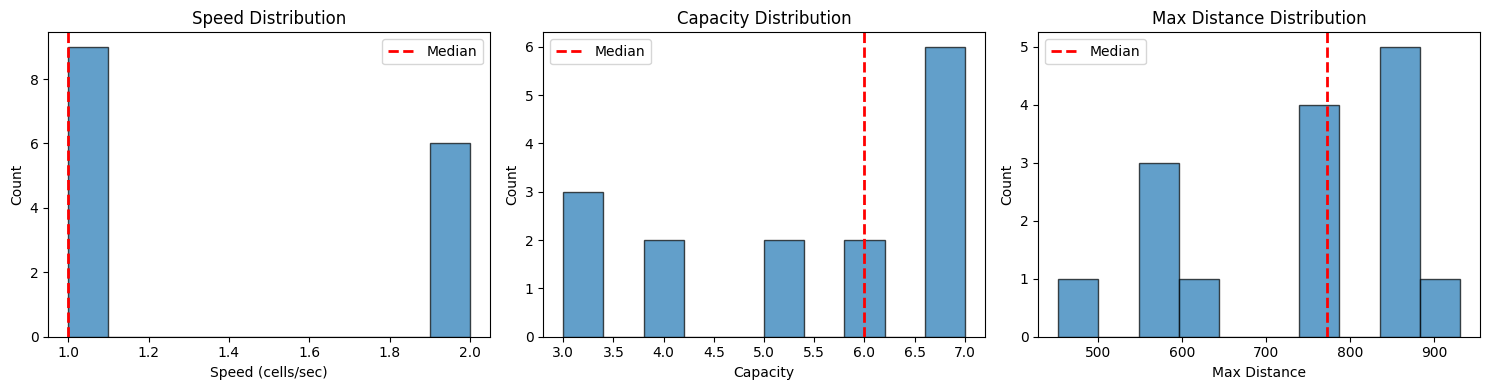

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# ==================== AGV 데이터 분석 ====================

# 데이터 추출 (올바른 컬럼명 사용)
speeds = agv_df['speed_cells_per_sec'].values  # ✅ 수정!
capacities = agv_df['capacity'].values
max_distances = agv_df['max_distance'].values

# 기본 통계
print("=== 속도(speed_cells_per_sec) ===")
print(f"최소: {speeds.min()}")
print(f"최대: {speeds.max()}")
print(f"평균: {speeds.mean():.2f}")
print(f"중앙값: {np.median(speeds):.2f}")
print(f"Q1 (25%): {np.percentile(speeds, 25):.2f}")
print(f"Q3 (75%): {np.percentile(speeds, 75):.2f}")
print(f"표준편차: {speeds.std():.2f}")

print("\n=== 용량(capacity) ===")
print(f"최소: {capacities.min()}")
print(f"최대: {capacities.max()}")
print(f"평균: {capacities.mean():.2f}")
print(f"중앙값: {np.median(capacities):.2f}")
print(f"Q1 (25%): {np.percentile(capacities, 25):.2f}")
print(f"Q3 (75%): {np.percentile(capacities, 75):.2f}")
print(f"총 용량: {capacities.sum()}")

print("\n=== 최대거리(max_distance) ===")
print(f"최소: {max_distances.min()}")
print(f"최대: {max_distances.max()}")
print(f"평균: {max_distances.mean():.2f}")
print(f"중앙값: {np.median(max_distances):.2f}")
print(f"Q1 (25%): {np.percentile(max_distances, 25):.2f}")
print(f"Q3 (75%): {np.percentile(max_distances, 75):.2f}")

print(f"\n총 AGV 대수: {len(agv_df)}")

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(speeds, bins=10, edgecolor='black', alpha=0.7)
axes[0].set_title('Speed Distribution')
axes[0].set_xlabel('Speed (cells/sec)')
axes[0].set_ylabel('Count')
axes[0].axvline(np.median(speeds), color='red', linestyle='--', linewidth=2, label='Median')
axes[0].legend()

axes[1].hist(capacities, bins=10, edgecolor='black', alpha=0.7)
axes[1].set_title('Capacity Distribution')
axes[1].set_xlabel('Capacity')
axes[1].set_ylabel('Count')
axes[1].axvline(np.median(capacities), color='red', linestyle='--', linewidth=2, label='Median')
axes[1].legend()

axes[2].hist(max_distances, bins=10, edgecolor='black', alpha=0.7)
axes[2].set_title('Max Distance Distribution')
axes[2].set_xlabel('Max Distance')
axes[2].set_ylabel('Count')
axes[2].axvline(np.median(max_distances), color='red', linestyle='--', linewidth=2, label='Median')
axes[2].legend()

plt.tight_layout()
plt.show()


=== 작업 거리 (from DEPOT) ===
최소: 13
최대: 113
평균: 55.88
중앙값: 56.00
Q1: 40.00
Q3: 73.00

=== 작업 수요량(demand) ===
최소: 1
최대: 3
평균: 2.14
중앙값: 2.00
Q1: 1.00
Q3: 3.00
총 수요: 214

=== 작업 시간(service_time) ===
최소: 15
최대: 120
평균: 69.32
중앙값: 68.00
총 작업시간: 6932

=== 마감시간(deadline) ===
최소: 242
최대: 662
평균: 437.98
중앙값: 426.00

총 작업 개수: 100


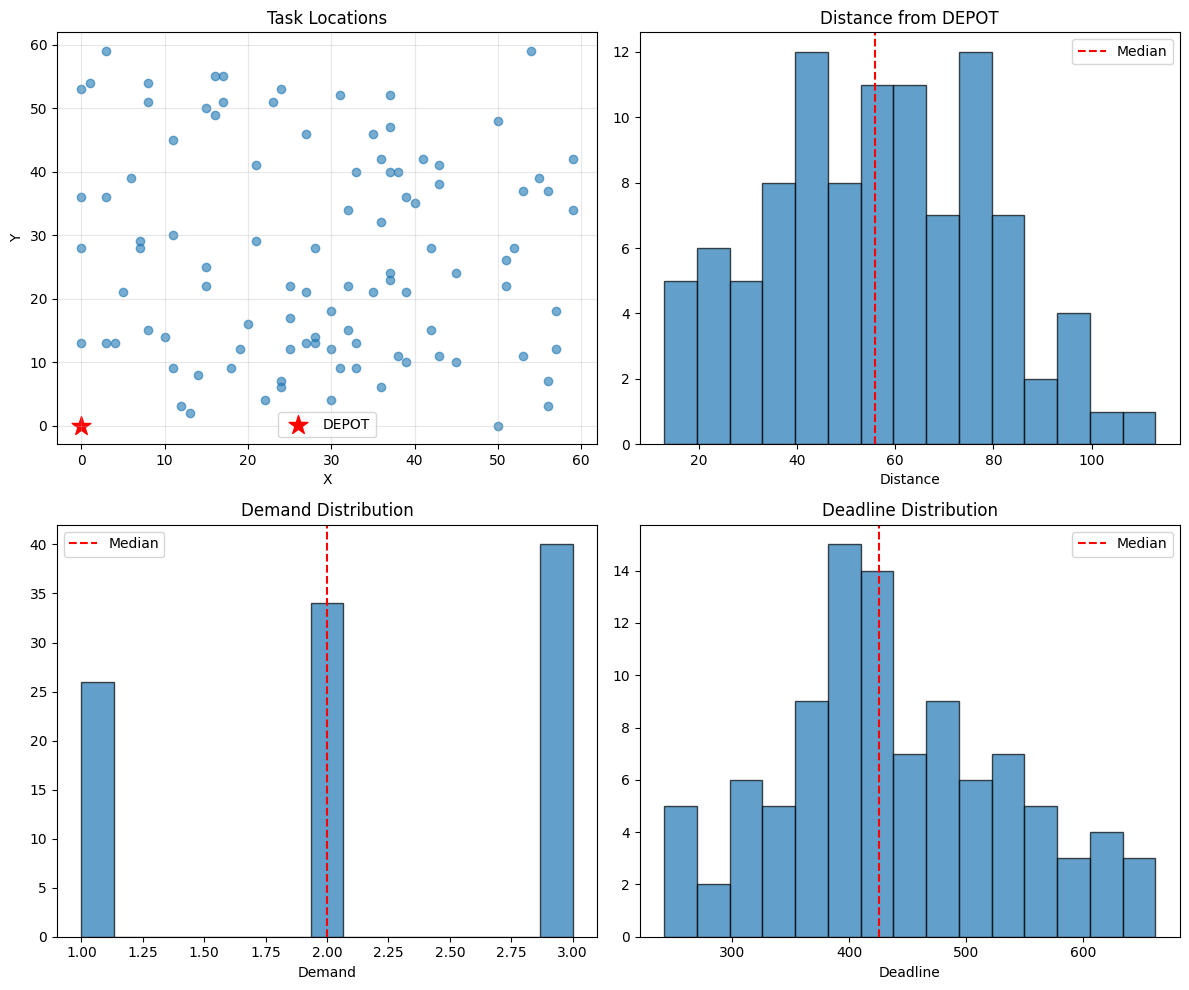

In [126]:
# DEPOT(0,0)으로부터 거리 계산
task_df['distance_from_depot'] = task_df['x'].abs() + task_df['y'].abs()

# 데이터 추출
distances = task_df['distance_from_depot'].values
demands = task_df['demand'].values
service_times = task_df['service_time'].values
deadlines = task_df['deadline'].values

print("\n" + "="*50)
print("=== 작업 거리 (from DEPOT) ===")
print(f"최소: {distances.min()}")
print(f"최대: {distances.max()}")
print(f"평균: {distances.mean():.2f}")
print(f"중앙값: {np.median(distances):.2f}")
print(f"Q1: {np.percentile(distances, 25):.2f}")
print(f"Q3: {np.percentile(distances, 75):.2f}")

print("\n=== 작업 수요량(demand) ===")
print(f"최소: {demands.min()}")
print(f"최대: {demands.max()}")
print(f"평균: {demands.mean():.2f}")
print(f"중앙값: {np.median(demands):.2f}")
print(f"Q1: {np.percentile(demands, 25):.2f}")
print(f"Q3: {np.percentile(demands, 75):.2f}")
print(f"총 수요: {demands.sum()}")

print("\n=== 작업 시간(service_time) ===")
print(f"최소: {service_times.min()}")
print(f"최대: {service_times.max()}")
print(f"평균: {service_times.mean():.2f}")
print(f"중앙값: {np.median(service_times):.2f}")
print(f"총 작업시간: {service_times.sum()}")

print("\n=== 마감시간(deadline) ===")
print(f"최소: {deadlines.min()}")
print(f"최대: {deadlines.max()}")
print(f"평균: {deadlines.mean():.2f}")
print(f"중앙값: {np.median(deadlines):.2f}")

print(f"\n총 작업 개수: {len(task_df)}")

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 작업 위치 분포
axes[0, 0].scatter(task_df['x'], task_df['y'], alpha=0.6)
axes[0, 0].scatter(0, 0, color='red', s=200, marker='*', label='DEPOT')
axes[0, 0].set_title('Task Locations')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 거리 분포
axes[0, 1].hist(distances, bins=15, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distance from DEPOT')
axes[0, 1].set_xlabel('Distance')
axes[0, 1].axvline(np.median(distances), color='red', linestyle='--', label='Median')
axes[0, 1].legend()

# 수요량 분포
axes[1, 0].hist(demands, bins=15, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Demand Distribution')
axes[1, 0].set_xlabel('Demand')
axes[1, 0].axvline(np.median(demands), color='red', linestyle='--', label='Median')
axes[1, 0].legend()

# Deadline 분포
axes[1, 1].hist(deadlines, bins=15, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Deadline Distribution')
axes[1, 1].set_xlabel('Deadline')
axes[1, 1].axvline(np.median(deadlines), color='red', linestyle='--', label='Median')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [127]:
print("=== 전역 분석 ===")

total_capacity = agv_df['capacity'].sum()
total_demand = task_df['demand'].sum()
capacity_tightness = total_demand / total_capacity

print(f"총 AGV 용량: {total_capacity}")
print(f"총 작업 수요: {total_demand}")
print(f"용량 여유도: {capacity_tightness:.2%}")

if capacity_tightness > 0.9:
    print("⚠️ 용량이 매우 타이트함! 거의 모든 AGV 필요")
elif capacity_tightness > 0.7:
    print("✅ 적당한 용량")
else:
    print("✅ 용량 여유 있음")

# 이론적 최소 왕복 횟수
max_capacity_single = agv_df['capacity'].max()
min_trips = np.ceil(total_demand / max_capacity_single)
print(f"\n이론적 최소 왕복 횟수: {min_trips:.0f}회")

# 긴급 작업 비율
median_speed = np.median(agv_df['speed_cells_per_sec'])
task_df['slack_time'] = (
    task_df['deadline'] - 
    task_df['distance_from_depot'] / median_speed - 
    task_df['service_time']
)

urgent_threshold = task_df['slack_time'].quantile(0.3)  # 하위 30%
urgent_tasks = len(task_df[task_df['slack_time'] < urgent_threshold])
deadline_pressure = urgent_tasks / len(task_df)

print(f"\n긴급 작업 비율: {deadline_pressure:.2%}")
if deadline_pressure > 0.4:
    print("⚠️ Deadline 압박 심함! Deadline 우선 전략 필요")
else:
    print("✅ Deadline 여유 있음")

# 평균 이동 시간 vs 평균 작업 시간
avg_travel_time = distances.mean() / median_speed
avg_service_time = service_times.mean()

print(f"\n평균 이동 시간: {avg_travel_time:.2f}초")
print(f"평균 작업 시간: {avg_service_time:.2f}초")
print(f"이동/작업 비율: {avg_travel_time/avg_service_time:.2f}")

=== 전역 분석 ===
총 AGV 용량: 81
총 작업 수요: 214
용량 여유도: 264.20%
⚠️ 용량이 매우 타이트함! 거의 모든 AGV 필요

이론적 최소 왕복 횟수: 31회

긴급 작업 비율: 29.00%
✅ Deadline 여유 있음

평균 이동 시간: 55.88초
평균 작업 시간: 69.32초
이동/작업 비율: 0.81


In [128]:
# ==================== AGV 분류 ====================

# 방법1.중앙값 기준 ±20% 방식
median_speed = np.median(agv_df['speed_cells_per_sec'])
median_capacity = np.median(agv_df['capacity'])

agv_df['speed_tier'] = agv_df['speed_cells_per_sec'].apply(
    lambda x: 'fast' if x > median_speed * 1.2 
    else ('slow' if x < median_speed * 0.8 else 'medium')
)

agv_df['capacity_tier'] = agv_df['capacity'].apply(
    lambda x: 'large' if x > median_capacity * 1.2 
    else ('small' if x < median_capacity * 0.8 else 'medium')
)

agv_df['agv_type'] = agv_df['speed_tier'] + '_' + agv_df['capacity_tier']

print("\n" + "="*50)
print("=== AGV 분류 결과 (중앙값 ±20%) ===")
print("\n속도별:")
print(agv_df['speed_tier'].value_counts())
print("\n용량별:")
print(agv_df['capacity_tier'].value_counts())
print("\n타입별:")
print(agv_df['agv_type'].value_counts())

# 효율 점수 계산
agv_df['efficiency_score'] = (
    (agv_df['speed_cells_per_sec'] / agv_df['speed_cells_per_sec'].max()) * 0.4 +
    (agv_df['capacity'] / agv_df['capacity'].max()) * 0.3 +
    (agv_df['max_distance'] / agv_df['max_distance'].max()) * 0.3
)

print("\n=== 효율 점수 Top 5 ===")
print(agv_df.nlargest(5, 'efficiency_score')[['agv_id', 'speed_cells_per_sec', 'capacity', 'efficiency_score']])


=== AGV 분류 결과 (중앙값 ±20%) ===

속도별:
speed_tier
medium    9
fast      6
Name: count, dtype: int64

용량별:
capacity_tier
medium    10
small      5
Name: count, dtype: int64

타입별:
agv_type
fast_medium      6
medium_small     5
medium_medium    4
Name: count, dtype: int64

=== 효율 점수 Top 5 ===
   agv_id  speed_cells_per_sec  capacity  efficiency_score
0    A001                    2         7          0.982922
2    A003                    2         7          0.978410
13   A014                    2         7          0.948765
4    A005                    2         5          0.893663
3    A004                    2         5          0.867884


In [129]:
# 방법2. 사분위수
Q1 = agv_df['efficiency_score'].quantile(0.25)  # 25% 지점
Q3 = agv_df['efficiency_score'].quantile(0.75)  # 75% 지점

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")

agv_df['performance_group_q'] = agv_df['efficiency_score'].apply(
    lambda x: 'high' if x > Q3 
    else ('low' if x < Q1 else 'medium')
)

print(agv_df['performance_group_q'].value_counts())

# 예상 결과:
# high: 약 25% (3~4대)
# medium: 약 50% (7~8대)
# low: 약 25% (3~4대)

Q1: 0.64
Q3: 0.88
performance_group_q
medium    7
high      4
low       4
Name: count, dtype: int64


In [130]:
#방법 3. 순위 기반 균등 분할
agv_df_sorted = agv_df.sort_values('efficiency_score', ascending=False).reset_index(drop=True)

# 상위 5대 / 중위 5대 / 하위 5대
agv_df_sorted['performance_group'] = 'medium'
agv_df_sorted.loc[0:4, 'performance_group'] = 'high'  # 상위 5대
agv_df_sorted.loc[10:14, 'performance_group'] = 'low'  # 하위 5대

print("\n=== 성능 그룹 (효율 점수 기준 3등분) ===")
print(agv_df_sorted['performance_group'].value_counts())

print("\n고성능 그룹:")
print(agv_df_sorted[agv_df_sorted['performance_group']=='high'][['agv_id', 'speed_cells_per_sec', 'capacity', 'efficiency_score']])

print("\n저성능 그룹:")
print(agv_df_sorted[agv_df_sorted['performance_group']=='low'][['agv_id', 'speed_cells_per_sec', 'capacity', 'efficiency_score']])


=== 성능 그룹 (효율 점수 기준 3등분) ===
performance_group
high      5
medium    5
low       5
Name: count, dtype: int64

고성능 그룹:
  agv_id  speed_cells_per_sec  capacity  efficiency_score
0   A001                    2         7          0.982922
1   A003                    2         7          0.978410
2   A014                    2         7          0.948765
3   A005                    2         5          0.893663
4   A004                    2         5          0.867884

저성능 그룹:
   agv_id  speed_cells_per_sec  capacity  efficiency_score
10   A006                    1         4          0.641139
11   A011                    1         6          0.634049
12   A002                    1         3          0.610526
13   A009                    1         3          0.510311
14   A008                    1         3          0.474221


In [131]:
median_speed = agv_df['speed_cells_per_sec'].median()

# 실질 여유 시간
task_df['slack_time'] = (
    task_df['deadline'] - 
    (task_df['distance_from_depot'] / median_speed) - 
    task_df['service_time']
)

# 난이도 점수 (종합)
task_df['difficulty_score'] = (
    (task_df['distance_from_depot'] / task_df['distance_from_depot'].max()) * 0.25 +
    (1 / (task_df['slack_time'] + 1)) * 0.50 +  # 긴급도 가장 중요
    (task_df['demand'] / task_df['demand'].max()) * 0.25
)

# 정렬 (어려운 순서)
task_df_sorted = task_df.sort_values('difficulty_score', ascending=False).reset_index(drop=True)

print("=== Task 난이도 분석 ===")
print(f"가장 어려운 작업 Top 5:")
print(task_df_sorted.head()[['task_id', 'distance_from_depot', 'slack_time', 'demand', 'difficulty_score']])
print(f"\n가장 쉬운 작업 Top 5:")
print(task_df_sorted.tail()[['task_id', 'distance_from_depot', 'slack_time', 'demand', 'difficulty_score']])

n_tasks = len(task_df_sorted)

hard_tasks = task_df_sorted.iloc[0:int(n_tasks * 0.33)]
medium_tasks = task_df_sorted.iloc[int(n_tasks * 0.33):int(n_tasks * 0.67)]
easy_tasks = task_df_sorted.iloc[int(n_tasks * 0.67):]

print(f"\n=== Task 그룹 분할 ===")
print(f"어려운 작업: {len(hard_tasks)}개")
print(f"보통 작업: {len(medium_tasks)}개")
print(f"쉬운 작업: {len(easy_tasks)}개")

high_perf_agvs = agv_df_sorted[agv_df_sorted['performance_group'] == 'high']['agv_id'].tolist()
mid_perf_agvs = agv_df_sorted[agv_df_sorted['performance_group'] == 'medium']['agv_id'].tolist()
low_perf_agvs = agv_df_sorted[agv_df_sorted['performance_group'] == 'low']['agv_id'].tolist()

print(f"\n=== AGV 그룹 ===")
print(f"고성능 AGV ({len(high_perf_agvs)}대): {high_perf_agvs}")
print(f"중성능 AGV ({len(mid_perf_agvs)}대): {mid_perf_agvs}")
print(f"저성능 AGV ({len(low_perf_agvs)}대): {low_perf_agvs}")

# 라운드 로빈
assignments = {}

print(f"\n=== 매칭 결과 ===")
for i, agv_id in enumerate(high_perf_agvs):
    # 라운드 로빈: i번째 AGV는 i, i+5, i+10, ... 작업 담당
    agv_task_indices = range(i, len(hard_tasks), len(high_perf_agvs))
    agv_tasks = hard_tasks.iloc[list(agv_task_indices)]
    assignments[agv_id] = agv_tasks.to_dict('records')
    print(f"{agv_id}: {len(agv_tasks)}개 (어려운 작업)")

for i, agv_id in enumerate(mid_perf_agvs):
    agv_task_indices = range(i, len(medium_tasks), len(mid_perf_agvs))
    agv_tasks = medium_tasks.iloc[list(agv_task_indices)]
    assignments[agv_id] = agv_tasks.to_dict('records')
    print(f"{agv_id}: {len(agv_tasks)}개 (보통 작업)")

for i, agv_id in enumerate(low_perf_agvs):
    agv_task_indices = range(i, len(easy_tasks), len(low_perf_agvs))
    agv_tasks = easy_tasks.iloc[list(agv_task_indices)]
    assignments[agv_id] = agv_tasks.to_dict('records')
    print(f"{agv_id}: {len(agv_tasks)}개 (쉬운 작업)")



print(f"\n=== 할당 검증 ===")
total_assigned = sum(len(tasks) for tasks in assignments.values())
print(f"총 작업 수: {len(task_df)}")
print(f"할당된 작업 수: {total_assigned}")
print(f"✅ 모든 작업 할당 완료!" if total_assigned == len(task_df) else "❌ 작업 누락!")


print(f"\nAGV별 작업 개수:")
for agv_id, tasks in assignments.items():
    total_demand = sum(t['demand'] for t in tasks)
    agv_capacity = agv_df[agv_df['agv_id'] == agv_id]['capacity'].values[0]
    print(f"  {agv_id}: {len(tasks)}개 작업, 총 수요 {total_demand} (capacity: {agv_capacity})")

=== Task 난이도 분석 ===
가장 어려운 작업 Top 5:
  task_id  distance_from_depot  slack_time  demand  difficulty_score
0   T0076                  113       453.0       3          0.501101
1   T0087                   98       440.0       3          0.467948
2   T0073                   94       405.0       3          0.459196
3   T0023                   93       503.0       3          0.456744
4   T0091                   90       222.0       3          0.451357

가장 쉬운 작업 Top 5:
   task_id  distance_from_depot  slack_time  demand  difficulty_score
95   T0019                   22       245.0       1          0.134038
96   T0021                   20       283.0       1          0.129342
97   T0003                   16       259.0       1          0.120655
98   T0051                   15       171.0       1          0.119426
99   T0062                   13       280.0       1          0.113874

=== Task 그룹 분할 ===
어려운 작업: 33개
보통 작업: 34개
쉬운 작업: 33개

=== AGV 그룹 ===
고성능 AGV (5대): ['A001', 'A003', 'A014', 'A0

In [132]:
# 논외로 생각해볼 것
small_capacity_agvs = ['A008', 'A009', 'A002']

for agv_id in small_capacity_agvs:
    tasks = assignments[agv_id]
    # demand 작은 순으로 재정렬
    tasks_sorted = sorted(tasks, key=lambda t: t['demand'])
    assignments[agv_id] = tasks_sorted

## 3. 데이터 전처리 & 초기값 설정

In [133]:
# AGV 스펙 딕셔너리
agvs = {
    r["agv_id"]: dict(
        speed=float(r["speed_cells_per_sec"]),
        capacity=float(r["capacity"]),
        max_distance=float(r["max_distance"])
    )
    for _, r in agv_df.iterrows()
}

# Task 딕셔너리
tasks = {
    r["task_id"]: dict(
        pos=(int(r["x"]), int(r["y"])),
        service_time=float(r["service_time"]),
        deadline=float(r["deadline"]),
        demand=float(r["demand"])
    )
    for _, r in task_df.iterrows()
}

# ---------- 상태 정의 ----------
class AGVState:
    def __init__(self, agv_id, speed, capacity, max_distance):
        self.agv_id = agv_id
        self.speed = float(speed)
        self.capacity = float(capacity)
        self.max_distance = float(max_distance)

        self.route = [DEPOT]
        self.last_xy = DEPOT_XY
        self.tour_dist = 0.0
        self.tour_load = 0.0
        self.tour_has_task = False
        self.clock = 0.0
        self.current_route = []       # 왕복 작업 기록
        self.all_routes = []          # 왕복 투어 기록
        self.total_tardiness = 0.0    # 지각 기록 -> 패널티 부여

    def can_add_now(self, task):
        (tx, ty), dem = task["pos"], task["demand"]
        d_to = manhattan(self.last_xy, (tx, ty))
        d_back = manhattan((tx, ty), DEPOT_XY)
        if self.tour_dist + d_to + d_back > self.max_distance:
            return False
        if self.tour_load + dem > self.capacity:
            return False
        return True

    #작업 수행 내부 상태 갱신 메서드
    def add_task(self, tid, task):
        (tx, ty) = task["pos"]
        d = manhattan(self.last_xy, (tx, ty)) #거리계산
        self.clock += d / self.speed #이동 시간 누적 시킴
        self.last_xy = (tx, ty) #위치 상태 업데이트
        self.tour_dist += d #거리 업데이트
        self.tour_load += task["demand"] # 이동하면서 시간과 상태 갱신
        arrival_time = self.clock
        self.route.append(tid)
        self.clock += task["service_time"]
        completion_time = self.clock
        #지각 계산
        tardiness = max(0.0, completion_time - task["deadline"])
        self.total_tardiness += tardiness
        #상세 정보 저장
        self.current_route.append({  # ← self.route 대신 current_route!
            'task_id': tid,
            'position': (tx, ty),
            'arrival_time': arrival_time,      # 도착 시각
            'completion_time': completion_time, # 완료 시각
            'deadline': task["deadline"],       # 마감 시간
            'tardiness': tardiness,             # 지각
            'demand': task["demand"]            # 수요량
        })
        self.tour_has_task = True #빈손 왕복이 아님을 제약 체크
        return tardiness

    def close_tour(self):
        if not self.tour_has_task:
            return  # 작업 없으면 종료
        
        # DEPOT 복귀
        if self.last_xy != DEPOT_XY:
            d_back = manhattan(self.last_xy, DEPOT_XY)
            self.clock += d_back / self.speed
            self.tour_dist += d_back
            self.last_xy = DEPOT_XY
        
        self.all_routes.append({  # ← 추가!
            'route_num': len(self.all_routes) + 1,  # 몇 번째 왕복인지
            'tasks': self.current_route.copy(),     # 작업 목록 복사
            'total_load': self.tour_load,           # 이번 왕복 적재량
            'total_distance': self.tour_dist,       # 이번 왕복 거리
            'end_time': self.clock                  # 이번 왕복 종료 시각
        })
        
        self.current_route = []
        self.tour_dist = 0.0
        self.tour_load = 0.0
        self.tour_has_task = False


    def get_total_score(self):
        # 총 점수 계산
        # 패널티 값 사용자 지정
        WEIGHT_TRAVEL = 3
        WEIGHT_SERVICE = 2
        WEIGHT_TARDINESS = 7
        
        total_travel_time = 0.0
        for route in self.all_routes:
            # 거리 ÷ 속도 = 시간
            travel_time = route['total_distance'] / self.speed
            total_travel_time += travel_time
        
        total_service_time = 0.0
        for route in self.all_routes:
            for task_info in route['tasks']:
                # 원본 task에서 service_time 가져오기
                tid = task_info['task_id']
                total_service_time += tasks[tid]['service_time']
 
        score = (
            WEIGHT_TRAVEL * total_travel_time +
            WEIGHT_SERVICE * total_service_time +
            WEIGHT_TARDINESS * self.total_tardiness
        )
        
        return {
            'total_score': score,
            'travel_time': total_travel_time,
            'service_time': total_service_time,
            'tardiness': self.total_tardiness,
            'num_routes': len(self.all_routes)
        }

## 3-1. 초기해 설정
- 고성능 : 스피드 좋음, 작업량 좋음 > 멀리.
- 저 성능 : 스피드 낮음, 작업량 낮음 > 가까이.
- 중 성능 : 1. 스피드가 좋고 작업량이 낮음 > 멀고 작업량이 적은 곳.
- 중 성능 : 2. 스피드가 낮고 작업량이 좋음 > 가깝고 작업량이 많은 곳

In [134]:
def assign_initial_routes_by_capability(tasks_dict, agv_dict):
    """
    기존 AGVState, tasks 구조 그대로 사용하는 초기해 생성 함수
    - 고성능: 속도 높고 용량 큼 → 먼 작업 우선
    - 중성능 fast: 속도 높고 용량 낮음 → 멀리 & demand 적은 곳
    - 중성능 slow: 속도 낮고 용량 큼 → 가까이 & demand 많은 곳
    - 저성능: 속도 낮고 용량 작음 → 가까운 곳 위주
    """
    DEPOT_XY = (0, 0)
    agv_states = {
        agv_id: AGVState(agv_id, a["speed"], a["capacity"], a["max_distance"])
        for agv_id, a in agv_dict.items()
    }

    # Task 리스트 변환
    task_list = [
        {"task_id": tid, **info,
         "distance": manhattan(info["pos"], DEPOT_XY)}
        for tid, info in tasks_dict.items()
    ]

    # AGV 그룹 분류
    high, mid_fast, mid_slow, low = [], [], [], []
    for agv_id, spec in agv_dict.items():
        s, c = spec["speed"], spec["capacity"]
        if s >= 2 and c >= 6:
            high.append(agv_id)
        elif s >= 2 and c < 6:
            mid_fast.append(agv_id)
        elif s < 2 and c >= 6:
            mid_slow.append(agv_id)
        else:
            low.append(agv_id)

    # 작업 정렬 기준
    sorted_tasks = {
        "high": sorted(task_list, key=lambda x: (-x["distance"], x["deadline"])),
        "mid_fast": sorted(task_list, key=lambda x: (-x["distance"], x["demand"])),
        "mid_slow": sorted(task_list, key=lambda x: (x["distance"], -x["demand"])),
        "low": sorted(task_list, key=lambda x: (x["distance"], x["demand"]))
    }

    # 분배 결과
    remaining_tasks = set([t["task_id"] for t in task_list])

    def assign_tasks_to_group(group, tasks_sorted):
        for agv_id in group:
            agv = agv_states[agv_id]
            for t in list(tasks_sorted):
                if t["task_id"] not in remaining_tasks:
                    continue
                if not agv.can_add_now(t):
                    continue
                agv.add_task(t["task_id"], t)
                remaining_tasks.remove(t["task_id"])
            agv.close_tour()

    # 그룹별 할당
    assign_tasks_to_group(high, sorted_tasks["high"])
    assign_tasks_to_group(mid_fast, sorted_tasks["mid_fast"])
    assign_tasks_to_group(mid_slow, sorted_tasks["mid_slow"])
    assign_tasks_to_group(low, sorted_tasks["low"])

    # 남은 작업 있으면 가장 여유 있는 AGV에 추가
    if remaining_tasks:
        for tid in list(remaining_tasks):
            t = tasks_dict[tid]
            best_agv = min(
                agv_states.values(),
                key=lambda s: (s.clock + manhattan(s.last_xy, t["pos"]) / s.speed)
            )
            if best_agv.can_add_now(t):
                best_agv.add_task(tid, t)
                best_agv.close_tour()
                remaining_tasks.remove(tid)

    return agv_states


In [135]:
# 초기 분배 실행
initial_routes = assign_initial_routes_by_capability(tasks, agvs)

# 요약 출력
for agv_id, agv in initial_routes.items():
    score = agv.get_total_score()
    print(f"{agv_id}: 점수={score['total_score']:.2f}, 경로={len(agv.all_routes)}회, 지각={score['tardiness']:.1f}")


A001: 점수=7722.00, 경로=6회, 지각=770.0
A002: 점수=11237.00, 경로=6회, 지각=1255.0
A003: 점수=8763.50, 경로=6회, 지각=909.5
A004: 점수=9500.00, 경로=6회, 지각=1010.0
A005: 점수=10342.00, 경로=6회, 지각=1150.0
A006: 점수=8340.00, 경로=5회, 지각=844.0
A007: 점수=7758.00, 경로=3회, 지각=838.0
A008: 점수=6792.00, 경로=5회, 지각=648.0
A009: 점수=9428.00, 경로=6회, 지각=968.0
A010: 점수=9148.00, 경로=4회, 지각=968.0
A011: 점수=6757.00, 경로=4회, 지각=673.0
A012: 점수=4801.00, 경로=4회, 지각=395.0
A013: 점수=9821.00, 경로=7회, 지각=1100.0
A014: 점수=7384.50, 경로=5회, 지각=766.5
A015: 점수=4148.00, 경로=4회, 지각=284.0


## 4. Greedy Algorithm (탐욕 알고리즘)

In [136]:
# ===== 사전 캐시(선택) =====
dist_depot = {tid: manhattan(DEPOT_XY, tasks[tid]["pos"]) for tid in tasks}
round_trip_min = {tid: dist_depot[tid] * 2 for tid in tasks}

def eval_candidate_finish(agv, t):
    """현재 투어에서 바로 추가할 때의 완료시각/이동거리/지각"""
    d_to = manhattan(agv.last_xy, t["pos"])
    finish = agv.clock + d_to / agv.speed + t["service_time"]
    tardy = max(0.0, finish - t["deadline"])
    return finish, d_to, tardy

def eval_candidate_after_close(agv, t):
    """투어를 닫고(복귀) 새 투어로 바로 갈 때의 완료시각/추가이동/지각"""
    d_back = manhattan(agv.last_xy, DEPOT_XY)
    d_to = manhattan(DEPOT_XY, t["pos"])
    finish = agv.clock + d_back / agv.speed + d_to / agv.speed + t["service_time"]
    tardy = max(0.0, finish - t["deadline"])
    return finish, (d_back + d_to), tardy

# ===== 가중치 (추천값) =====
ALPHA = 1.0     # 완료시각 자체 가중
BETA  = 7.0     # 지각벌점 (크게)
GAMMA = 0.1     # 이동거리 가중 (작게)

# ===== AGV 초기화 =====
agv_states = [AGVState(aid, spec["speed"], spec["capacity"], spec["max_distance"])
              for aid, spec in agvs.items()]

# ----- (변경1) 동적 슬랙 우선 순서: 매 차례 남은 작업을 슬랙 기준으로 정렬 -----
remaining = list(tasks.keys())
while remaining:
    # 동적 슬랙 계산: "가장 빠르게 도착 가능한 AGV" 기준으로 슬랙 평가
    def best_slack(tid):
        t = tasks[tid]
        best_arrival = float('inf')
        for agv in agv_states:
            d_to = manhattan(agv.last_xy, t["pos"])
            arrival = agv.clock + d_to / agv.speed  # 도착 예상 시각
            if arrival < best_arrival:
                best_arrival = arrival
        return t["deadline"] - (best_arrival + t["service_time"])

    # 슬랙 적은 순(급한 일 먼저)
    ordered = sorted(remaining, key=best_slack)

    assigned_any = False
    for tid in ordered:
        if tid not in remaining:
            continue
        t = tasks[tid]
        best_tuple = None  # (score, finish, i, need_close, tie_breakers)

        for i, agv in enumerate(agv_states):
            # 1) 현재 투어에 바로 추가 가능?
            if agv.can_add_now(t):
                finish, d_inc, tardy = eval_candidate_finish(agv, t)
                score = ALPHA * finish + BETA * tardy + GAMMA * d_inc
                tie = (-agv.speed, agv.tour_load, len(agv.all_routes))  # 속도빠름, 적재적음, 왕복적음
                if (best_tuple is None) or (score, finish, tie) < (best_tuple[0], best_tuple[1], best_tuple[4]):
                    best_tuple = (score, finish, i, False, tie)
            else:
                # 2) 투어 닫고 새로? (최소 왕복 가능성 먼저 체크)
                if round_trip_min[tid] <= agv.max_distance and t["demand"] <= agv.capacity:
                    finish, d_inc, tardy = eval_candidate_after_close(agv, t)
                    score = ALPHA * finish + BETA * tardy + GAMMA * d_inc
                    tie = (-agv.speed, agv.tour_load, len(agv.all_routes))
                    if (best_tuple is None) or (score, finish, tie) < (best_tuple[0], best_tuple[1], best_tuple[4]):
                        best_tuple = (score, finish, i, True, tie)

        # 3) 적용
        if best_tuple is not None:
            _, _, i, need_close, _ = best_tuple
            if need_close:
                agv_states[i].close_tour()  # 빈손이면 내부적으로 no-op
            agv_states[i].add_task(tid, t)
            remaining.remove(tid)
            assigned_any = True

    # 이번 회차에서 아무것도 못 넣었으면, 안전 백업 경로로 강제 배정
    if not assigned_any:
        tid = ordered[0]
        t = tasks[tid]
        for i, agv in enumerate(agv_states):
            if round_trip_min[tid] <= agv.max_distance and t["demand"] <= agv.capacity:
                agv.close_tour()
                agv.add_task(tid, t)
                remaining.remove(tid)
                break

# ----- (추가) 마무리 DEPOT 복귀 -----
for agv in agv_states:
    agv.close_tour()


## 4-1. 탐욕 알고리즘 결과 보기

In [137]:
print("=== [탐욕 알고리즘 결과 요약] ===\n")

total_score_all = 0
total_tardiness_all = 0
total_routes_all = 0
total_tasks_all = 0

report_rows = []

for agv in agv_states:
    # 남은 투어 강제 마무리
    if agv.tour_has_task:
        agv.close_tour()
    
    # 점수 계산
    result = agv.get_total_score()
    score = result["total_score"]
    tardiness = result["tardiness"]
    n_routes = result["num_routes"]
    n_tasks = sum(len(r["tasks"]) for r in agv.all_routes)
    
    total_score_all += score
    total_tardiness_all += tardiness
    total_routes_all += n_routes
    total_tasks_all += n_tasks

    print(f"AGV {agv.agv_id}:")
    print(f"  🧭 총 점수 = {score:.2f}")
    print(f"  🚗 이동시간 = {result['travel_time']:.2f}")
    print(f"  ⚙️ 작업시간 = {result['service_time']:.2f}")
    print(f"  ⏰ 지각합계 = {tardiness:.2f}")
    print(f"  🔁 투어 수 = {n_routes}, 작업 수 = {n_tasks}")
    print("-"*50)
    
    report_rows.append({
        "AGV": agv.agv_id,
        "총점": round(score,2),
        "이동시간": round(result['travel_time'],2),
        "작업시간": round(result['service_time'],2),
        "지각": round(tardiness,2),
        "투어수": n_routes,
        "작업수": n_tasks
    })

# 전체 합계
print("\n=== [전체 요약] ===")
print(f"총 점수 합계: {total_score_all:.2f}")
print(f"총 지각 합계: {total_tardiness_all:.2f}")
print(f"총 투어 수: {total_routes_all}")
print(f"총 작업 수: {total_tasks_all}")
print("="*50)

# 보기 좋게 DataFrame으로 출력
summary_df = pd.DataFrame(report_rows)
display(summary_df.sort_values("총점"))


=== [탐욕 알고리즘 결과 요약] ===

AGV A001:
  🧭 총 점수 = 5547.00
  🚗 이동시간 = 271.00
  ⚙️ 작업시간 = 561.00
  ⏰ 지각합계 = 516.00
  🔁 투어 수 = 3, 작업 수 = 10
--------------------------------------------------
AGV A002:
  🧭 총 점수 = 3661.00
  🚗 이동시간 = 456.00
  ⚙️ 작업시간 = 345.00
  ⏰ 지각합계 = 229.00
  🔁 투어 수 = 5, 작업 수 = 5
--------------------------------------------------
AGV A003:
  🧭 총 점수 = 3963.00
  🚗 이동시간 = 213.00
  ⚙️ 작업시간 = 605.00
  ⏰ 지각합계 = 302.00
  🔁 투어 수 = 3, 작업 수 = 8
--------------------------------------------------
AGV A004:
  🧭 총 점수 = 3511.00
  🚗 이동시간 = 270.00
  ⚙️ 작업시간 = 465.00
  ⏰ 지각합계 = 253.00
  🔁 투어 수 = 4, 작업 수 = 7
--------------------------------------------------
AGV A005:
  🧭 총 점수 = 3472.50
  🚗 이동시간 = 204.00
  ⚙️ 작업시간 = 529.00
  ⏰ 지각합계 = 257.50
  🔁 투어 수 = 3, 작업 수 = 7
--------------------------------------------------
AGV A006:
  🧭 총 점수 = 3703.00
  🚗 이동시간 = 398.00
  ⚙️ 작업시간 = 383.00
  ⏰ 지각합계 = 249.00
  🔁 투어 수 = 3, 작업 수 = 6
--------------------------------------------------
AGV A007:
  🧭 총 점수 = 4150.

,AGV,총점,이동시간,작업시간,지각,투어수,작업수
10,A011,2873.0,326.0,419.0,151.0,2,5
4,A005,3472.5,204.0,529.0,257.5,3,7
3,A004,3511.0,270.0,465.0,253.0,4,7
1,A002,3661.0,456.0,345.0,229.0,5,5
14,A015,3675.0,474.0,325.0,229.0,3,5
5,A006,3703.0,398.0,383.0,249.0,3,6
8,A009,3866.0,458.0,371.0,250.0,4,6
2,A003,3963.0,213.0,605.0,302.0,3,8
12,A013,4047.5,217.0,594.0,315.5,3,8
13,A014,4100.0,263.0,588.0,305.0,3,7


## 위 결과 개선
- 지각 우선 탐욕으로 변경
- 과부하 AVG 분배
- 투어 제한 최적화
- 도착 시간 정렬 추가
- 시각화

### 지각 최우선 가중치 주기

## 4-2. 개선


In [138]:
# ===== 사전 캐시(선택) =====
dist_depot = {tid: manhattan(DEPOT_XY, tasks[tid]["pos"]) for tid in tasks}
round_trip_min = {tid: dist_depot[tid] * 2 for tid in tasks}

def eval_candidate_finish(agv, t):
    """현재 투어에서 바로 추가할 때의 완료시각/추가이동/지각"""
    d_to = manhattan(agv.last_xy, t["pos"])
    travel_time = d_to / agv.speed
    finish = agv.clock + travel_time + t["service_time"]
    tardy = max(0.0, finish - t["deadline"])
    return finish, d_to, tardy, travel_time

def eval_candidate_after_close(agv, t):
    """투어 닫고(복귀) 새 투어로 갈 때의 완료시각/추가이동/지각"""
    d_back = manhattan(agv.last_xy, DEPOT_XY)
    d_to = manhattan(DEPOT_XY, t["pos"])
    travel_time = d_back / agv.speed + d_to / agv.speed
    finish = agv.clock + travel_time + t["service_time"]
    tardy = max(0.0, finish - t["deadline"])
    return finish, (d_back + d_to), tardy, travel_time

# ===== 가중치 (설명용; 지각 최우선) =====
ALPHA = 1.0   # 이동+서비스 시간 가중(보조)
BETA  = 20.0  # 15 -> 20으로 조정하여 지각 줄이기 시도
GAMMA = 0.0   # 추가 이동거리 가중(원하면 0.1~0.5)

# ===== AGV 초기화 =====
agv_states = [
    AGVState(aid, spec["speed"], spec["capacity"], spec["max_distance"])
    for aid, spec in agvs.items()
]

# ===== 남은 작업 집합 =====
remaining = set(tasks.keys())

# 무한루프 방지 상한
loop_count = 0
MAX_LOOPS = 1000

while remaining:
    loop_count += 1
    if loop_count > MAX_LOOPS:
        print("🚨 Loop limit reached (possible infinite allocation). Breaking.")
        break

    # 동적 슬랙(가장 빨리 도착 가능한 AGV 기준) 계산
    def best_slack(tid):
        t = tasks[tid]
        best_arrival = float('inf')
        for agv in agv_states:
            d_to = manhattan(agv.last_xy, t["pos"])
            arrival = agv.clock + d_to / agv.speed
            if arrival < best_arrival:
                best_arrival = arrival
        return t["deadline"] - (best_arrival + t["service_time"])

    # 슬랙 적은 순(더 급한 일 먼저)
    ordered = sorted(list(remaining), key=best_slack)

    assigned_any = False

    for tid in ordered:
        # 남은 집합이 줄어들 수 있으니 가드
        if tid not in remaining:
            continue

        t = tasks[tid]
        best = None  # (score, finish, idx, need_close, tie)

        for i, agv in enumerate(agv_states):
            # 1) 현재 투어에 바로 추가 가능?
            if agv.can_add_now(t):
                finish, d_inc, tardy, trav_t = eval_candidate_finish(agv, t)
                # 지각 최우선 점수 (tardy^2 강벌점)
                score = ALPHA * (trav_t + t["service_time"]) + BETA * (tardy ** 2) + GAMMA * d_inc
                # 타이브레이커: 속도 빠름, 적재 적음, 왕복 적음
                tie = (-agv.speed, agv.tour_load, len(agv.all_routes))
                if (best is None) or (score, finish, tie) < (best[0], best[1], best[4]):
                    best = (score, finish, i, False, tie)

            else:
                # 2) 투어 닫고 새로 갈 수 있나? (최소 왕복 거리/용량으로 가능성 체크)
                if round_trip_min[tid] <= agv.max_distance and t["demand"] <= agv.capacity:
                    finish, d_inc, tardy, trav_t = eval_candidate_after_close(agv, t)
                    score = ALPHA * (trav_t + t["service_time"]) + BETA * (tardy ** 2) + GAMMA * d_inc
                    tie = (-agv.speed, agv.tour_load, len(agv.all_routes))
                    if (best is None) or (score, finish, tie) < (best[0], best[1], best[4]):
                        best = (score, finish, i, True, tie)

        # 실제 배정
        if best is not None:
            _, _, i, need_close, _ = best
            if need_close:
                agv_states[i].close_tour()  # 빈손이면 내부에서 no-op이어야 함
            agv_states[i].add_task(tid, t)
            remaining.remove(tid)         # ✅ 필수: 중복 배정 방지
            assigned_any = True

    # 이번 회차에서 아무것도 못 넣었으면, 안전 백업 경로로 강제 배정(1개라도 처리)
    if not assigned_any:
        # 가장 급한 한 개를 골라서
        tid = ordered[0]
        t = tasks[tid]
        placed = False
        for i, agv in enumerate(agv_states):
            if round_trip_min[tid] <= agv.max_distance and t["demand"] <= agv.capacity:
                agv.close_tour()
                agv.add_task(tid, t)
                remaining.remove(tid)
                placed = True
                break
        if not placed:
            print(f"⚠️ 남은 작업 {len(remaining)}개 중 {tid} 배정 불가. 조건 완화 필요. 중단합니다.")
            break

# ----- 모든 AGV 마무리 DEPOT 복귀 -----
for agv in agv_states:
    agv.close_tour()


In [139]:
print("=== [탐욕 알고리즘 결과2 요약] ===\n")

total_score_all = 0
total_tardiness_all = 0
total_routes_all = 0
total_tasks_all = 0

report_rows = []

for agv in agv_states:
    # 남은 투어 강제 마무리
    if agv.tour_has_task:
        agv.close_tour()
    
    # 점수 계산
    result = agv.get_total_score()
    score = result["total_score"]
    tardiness = result["tardiness"]
    n_routes = result["num_routes"]
    n_tasks = sum(len(r["tasks"]) for r in agv.all_routes)
    
    total_score_all += score
    total_tardiness_all += tardiness
    total_routes_all += n_routes
    total_tasks_all += n_tasks

    print(f"AGV {agv.agv_id}:")
    print(f"  🧭 총 점수 = {score:.2f}")
    print(f"  🚗 이동시간 = {result['travel_time']:.2f}")
    print(f"  ⚙️ 작업시간 = {result['service_time']:.2f}")
    print(f"  ⏰ 지각합계 = {tardiness:.2f}")
    print(f"  🔁 투어 수 = {n_routes}, 작업 수 = {n_tasks}")
    print("-"*50)
    
    report_rows.append({
        "AGV": agv.agv_id,
        "총점": round(score,2),
        "이동시간": round(result['travel_time'],2),
        "작업시간": round(result['service_time'],2),
        "지각": round(tardiness,2),
        "투어수": n_routes,
        "작업수": n_tasks
    })

# 전체 합계
print("\n=== [전체 요약] ===")
print(f"총 점수 합계: {total_score_all:.2f}")
print(f"총 지각 합계: {total_tardiness_all:.2f}")
print(f"총 투어 수: {total_routes_all}")
print(f"총 작업 수: {total_tasks_all}")
print("="*50)

# 보기 좋게 DataFrame으로 출력
summary_df = pd.DataFrame(report_rows)
display(summary_df.sort_values("총점"))


=== [탐욕 알고리즘 결과2 요약] ===

AGV A001:
  🧭 총 점수 = 3291.50
  🚗 이동시간 = 217.00
  ⚙️ 작업시간 = 510.00
  ⏰ 지각합계 = 231.50
  🔁 투어 수 = 3, 작업 수 = 8
--------------------------------------------------
AGV A002:
  🧭 총 점수 = 2688.00
  🚗 이동시간 = 328.00
  ⚙️ 작업시간 = 383.00
  ⏰ 지각합계 = 134.00
  🔁 투어 수 = 3, 작업 수 = 5
--------------------------------------------------
AGV A003:
  🧭 총 점수 = 3884.50
  🚗 이동시간 = 228.00
  ⚙️ 작업시간 = 608.00
  ⏰ 지각합계 = 283.50
  🔁 투어 수 = 3, 작업 수 = 8
--------------------------------------------------
AGV A004:
  🧭 총 점수 = 4531.50
  🚗 이동시간 = 357.00
  ⚙️ 작업시간 = 507.00
  ⏰ 지각합계 = 349.50
  🔁 투어 수 = 4, 작업 수 = 8
--------------------------------------------------
AGV A005:
  🧭 총 점수 = 3882.00
  🚗 이동시간 = 300.00
  ⚙️ 작업시간 = 525.00
  ⏰ 지각합계 = 276.00
  🔁 투어 수 = 4, 작업 수 = 7
--------------------------------------------------
AGV A006:
  🧭 총 점수 = 3642.00
  🚗 이동시간 = 360.00
  ⚙️ 작업시간 = 420.00
  ⏰ 지각합계 = 246.00
  🔁 투어 수 = 3, 작업 수 = 6
--------------------------------------------------
AGV A007:
  🧭 총 점수 = 4270.

,AGV,총점,이동시간,작업시간,지각,투어수,작업수
10,A011,2656.0,274.0,476.0,126.0,2,5
1,A002,2688.0,328.0,383.0,134.0,3,5
8,A009,3250.0,402.0,420.0,172.0,3,6
0,A001,3291.5,217.0,510.0,231.5,3,8
5,A006,3642.0,360.0,420.0,246.0,3,6
11,A012,3716.0,438.0,368.0,238.0,3,6
14,A015,3733.0,380.0,390.0,259.0,3,6
9,A010,3810.0,450.0,446.0,224.0,3,7
7,A008,3836.0,456.0,366.0,248.0,4,5
4,A005,3882.0,300.0,525.0,276.0,4,7


In [140]:
import pandas as pd
import copy

# ====== 설정 ======
BETA_VALUES = [10, 15, 20]  # 지각 가중치 후보
ALPHA = 1.0
GAMMA = 0.1

def run_greedy_with_beta(BETA_value):
    """지각 가중치별 탐욕 알고리즘 실행"""
    # AGV 초기화 (깊은 복사)
    agv_states = [
        AGVState(aid, spec["speed"], spec["capacity"], spec["max_distance"])
        for aid, spec in agvs.items()
    ]
    remaining = set(tasks.keys())
    loop_count, MAX_LOOPS = 0, 1000

    while remaining:
        loop_count += 1
        if loop_count > MAX_LOOPS:
            print("🚨 Loop limit reached")
            break

        # 슬랙 계산 (급한 작업 우선)
        def best_slack(tid):
            t = tasks[tid]
            best_arrival = float('inf')
            for agv in agv_states:
                d_to = manhattan(agv.last_xy, t["pos"])
                arrival = agv.clock + d_to / agv.speed
                best_arrival = min(best_arrival, arrival)
            return t["deadline"] - (best_arrival + t["service_time"])

        ordered = sorted(list(remaining), key=best_slack)
        assigned_any = False

        for tid in ordered:
            if tid not in remaining:
                continue
            t = tasks[tid]
            best = None
            for i, agv in enumerate(agv_states):
                if agv.can_add_now(t):
                    finish, d_inc, tardy, trav_t = eval_candidate_finish(agv, t)
                    score = ALPHA*(trav_t+t["service_time"]) + BETA_value*(tardy**2) + GAMMA*d_inc
                    if best is None or score < best[0]:
                        best = (score, i, False)
                else:
                    if round_trip_min[tid] <= agv.max_distance and t["demand"] <= agv.capacity:
                        finish, d_inc, tardy, trav_t = eval_candidate_after_close(agv, t)
                        score = ALPHA*(trav_t+t["service_time"]) + BETA_value*(tardy**2) + GAMMA*d_inc
                        if best is None or score < best[0]:
                            best = (score, i, True)
            if best is not None:
                _, i, need_close = best
                if need_close:
                    agv_states[i].close_tour()
                agv_states[i].add_task(tid, t)
                remaining.remove(tid)
                assigned_any = True

        if not assigned_any:
            tid = ordered[0]
            t = tasks[tid]
            for i, agv in enumerate(agv_states):
                if round_trip_min[tid] <= agv.max_distance and t["demand"] <= agv.capacity:
                    agv.close_tour()
                    agv.add_task(tid, t)
                    remaining.remove(tid)
                    break

    for agv in agv_states:
        agv.close_tour()

    # 요약 계산
    total_score = sum(a.get_total_score()['total_score'] for a in agv_states)
    total_tardiness = sum(a.total_tardiness for a in agv_states)
    total_routes = sum(len(a.all_routes) for a in agv_states)
    total_tasks = sum(len([t for r in a.all_routes for t in r['tasks']]) for a in agv_states)

    return {
        'BETA': BETA_value,
        '총점': round(total_score, 2),
        '지각합계': round(total_tardiness, 2),
        '투어수': total_routes,
        '작업수': total_tasks,
        'agv_states': agv_states
    }

# ====== 3단계 실험 ======
results = []
for b in BETA_VALUES:
    print(f"\n=== 🚀 BETA={b} 실험 중... ===")
    res = run_greedy_with_beta(b)
    results.append(res)

# ====== 결과 비교표 ======
result_df = pd.DataFrame(results)[['BETA','총점','지각합계','투어수','작업수']]
display(result_df)

# ====== 최적 run 선택 (지각합계 최소 기준) ======
best_run = min(results, key=lambda r: r['지각합계'])
best_beta = best_run['BETA']
best_agvs = best_run['agv_states']

print(f"\n✅ 최적 BETA={best_beta} 선택 (지각합계={best_run['지각합계']}, 총점={best_run['총점']})")


=== 🚀 BETA=10 실험 중... ===

=== 🚀 BETA=15 실험 중... ===

=== 🚀 BETA=20 실험 중... ===


,BETA,총점,지각합계,투어수,작업수
0,10,58624.5,4230.5,45,100
1,15,57980.5,4102.5,46,100
2,20,57980.5,4102.5,46,100



✅ 최적 BETA=15 선택 (지각합계=4102.5, 총점=57980.5)


## 5. 제출 파일 생성

In [141]:
!ls -lh submission.csv

-rw-r--r-- 1 root root 901 Oct 24 03:07 submission.csv


In [142]:
rows = []
for agv in agv_states:
    if agv.tour_has_task:
        agv.close_tour()
    cleaned = []
    for tok in agv.route:
        if cleaned and cleaned[-1] == DEPOT and tok == DEPOT:
            continue
        cleaned.append(tok)
    if cleaned == [DEPOT]:
        continue
    if cleaned[-1] != DEPOT:
        cleaned.append(DEPOT)
    rows.append({"agv_id": agv.agv_id, "route": ",".join(cleaned)})

out_df = pd.DataFrame(rows, columns=["agv_id","route"]).sort_values("agv_id")
out_df.to_csv(
    "submission.csv",
    index=False,             # ✅ 인덱스 저장 금지 (Row Error 방지)
    encoding="utf-8-sig",    # ✅ 한글 안전
    lineterminator="\n"      # ✅ 라인 엔딩 통일 (윈도우 ↔ 리눅스 호환)
)

print("[제출 완료] submission.csv 생성")
display(out_df.head())

[제출 완료] submission.csv 생성


,agv_id,route
0,A001,"DEPOT,T0051,T0040,T0024,T0041,T0094,T0049,T008..."
1,A002,"DEPOT,T0019,T0013,T0015,T0001,T0034,DEPOT"
2,A003,"DEPOT,T0052,T0061,T0055,T0016,T0097,T0043,T009..."
3,A004,"DEPOT,T0020,T0033,T0059,T0091,T0075,T0011,T000..."
4,A005,"DEPOT,T0014,T0095,T0098,T0080,T0030,T0007,T004..."


In [143]:
import pandas as pd

# 두 파일 불러오기
sample = pd.read_csv("sample_submission.csv")
submission = pd.read_csv("submission.csv")

# 구조 검증
assert list(sample.columns) == list(submission.columns), "❌ 컬럼 이름 또는 순서 불일치"
assert sample.shape == submission.shape, "❌ 행/열 개수가 다름"
assert submission.columns.tolist() == ["agv_id", "route"], "❌ 헤더 이름이 다릅니다"
assert not submission.isnull().any().any(), "❌ Null 값이 포함되어 있습니다"
assert not submission.duplicated("agv_id").any(), "❌ agv_id가 중복됩니다"

print("✅ 제출 파일 구조 검증 완료! sample_submission과 동일합니다.")
print(submission.shape)
submission.head()

FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'

In [ ]:
!head submission.csv